In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from tensorflow.keras.layers import Dense,Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Load the Data and Exploration

In [ ]:
df = pd.read_csv('Exam_Score_Prediction.csv')
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [ ]:
df.shape

(20000, 13)

In [ ]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [ ]:
df.sample(5)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
129,130,22,female,ba,5.74,96.6,yes,5.8,poor,self-study,high,moderate,67.4
12248,12249,24,male,diploma,5.61,99.0,yes,8.4,average,coaching,low,hard,73.3
17704,17705,19,male,b.sc,5.18,42.7,yes,5.1,average,mixed,medium,moderate,47.6
13039,13040,19,female,ba,7.09,79.1,yes,9.0,good,group study,low,easy,100.0
14184,14185,21,male,ba,2.60,59.8,yes,6.3,good,self-study,high,moderate,64.5


#Descriptive Statistics # Exploratory Data Analysis (EDA)


In [ ]:
display(df.describe())

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


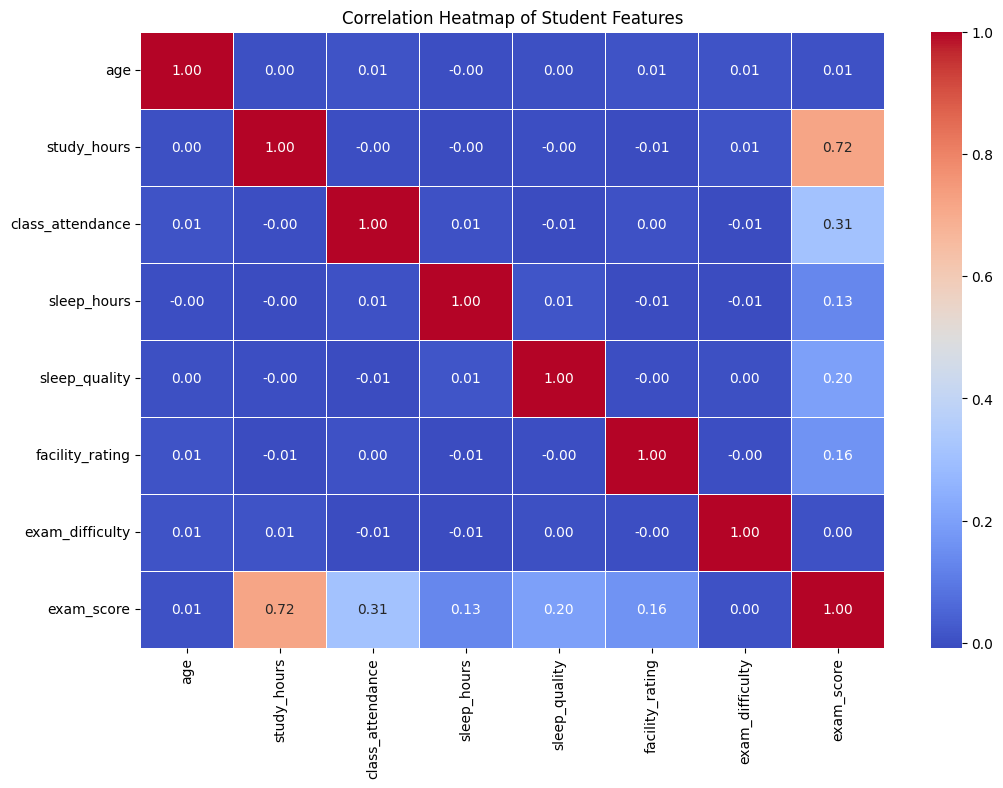

In [ ]:
df_corr = df.copy()
df_corr['sleep_quality'] = df_corr['sleep_quality'].map({'poor': 0, 'average': 1, 'good': 2})
df_corr['facility_rating'] = df_corr['facility_rating'].map({'low': 0, 'medium': 1, 'high': 2})
df_corr['exam_difficulty'] = df_corr['exam_difficulty'].map({'easy': 0, 'moderate': 1, 'hard': 2})
numerical_df = df_corr.select_dtypes(include=['number']).drop(columns=['student_id'])
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Student Features')
plt.show()

Distribution Analysis:
                  Skewness  Kurtosis
age               0.014752 -1.230292
study_hours      -0.010299 -1.202389
class_attendance -0.001290 -1.198728
sleep_hours      -0.000771 -1.208531
exam_score       -0.049059 -0.618423


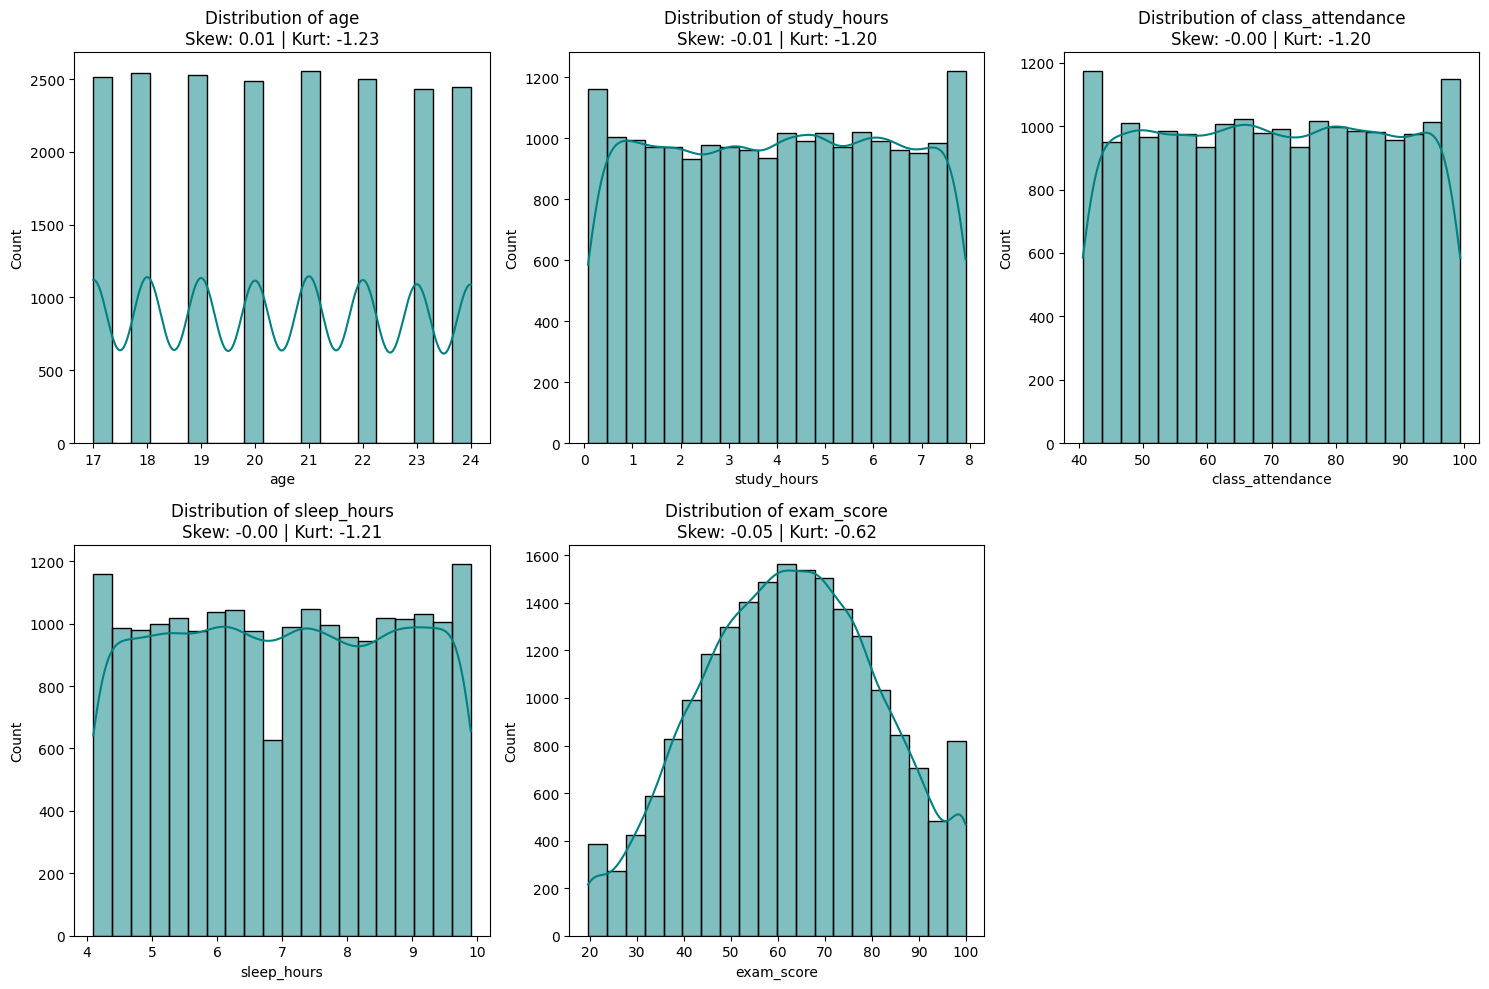

In [ ]:
numerical_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
skewness = df[numerical_cols].skew()
kurtosis = df[numerical_cols].kurtosis()
dist_summary = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print("Distribution Analysis:")
print(dist_summary)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='teal', bins=20)
    plt.title(f'Distribution of {col}\nSkew: {skewness[col]:.2f} | Kurt: {kurtosis[col]:.2f}')

plt.tight_layout()
plt.savefig('distribution_analysis.png')
plt.show()

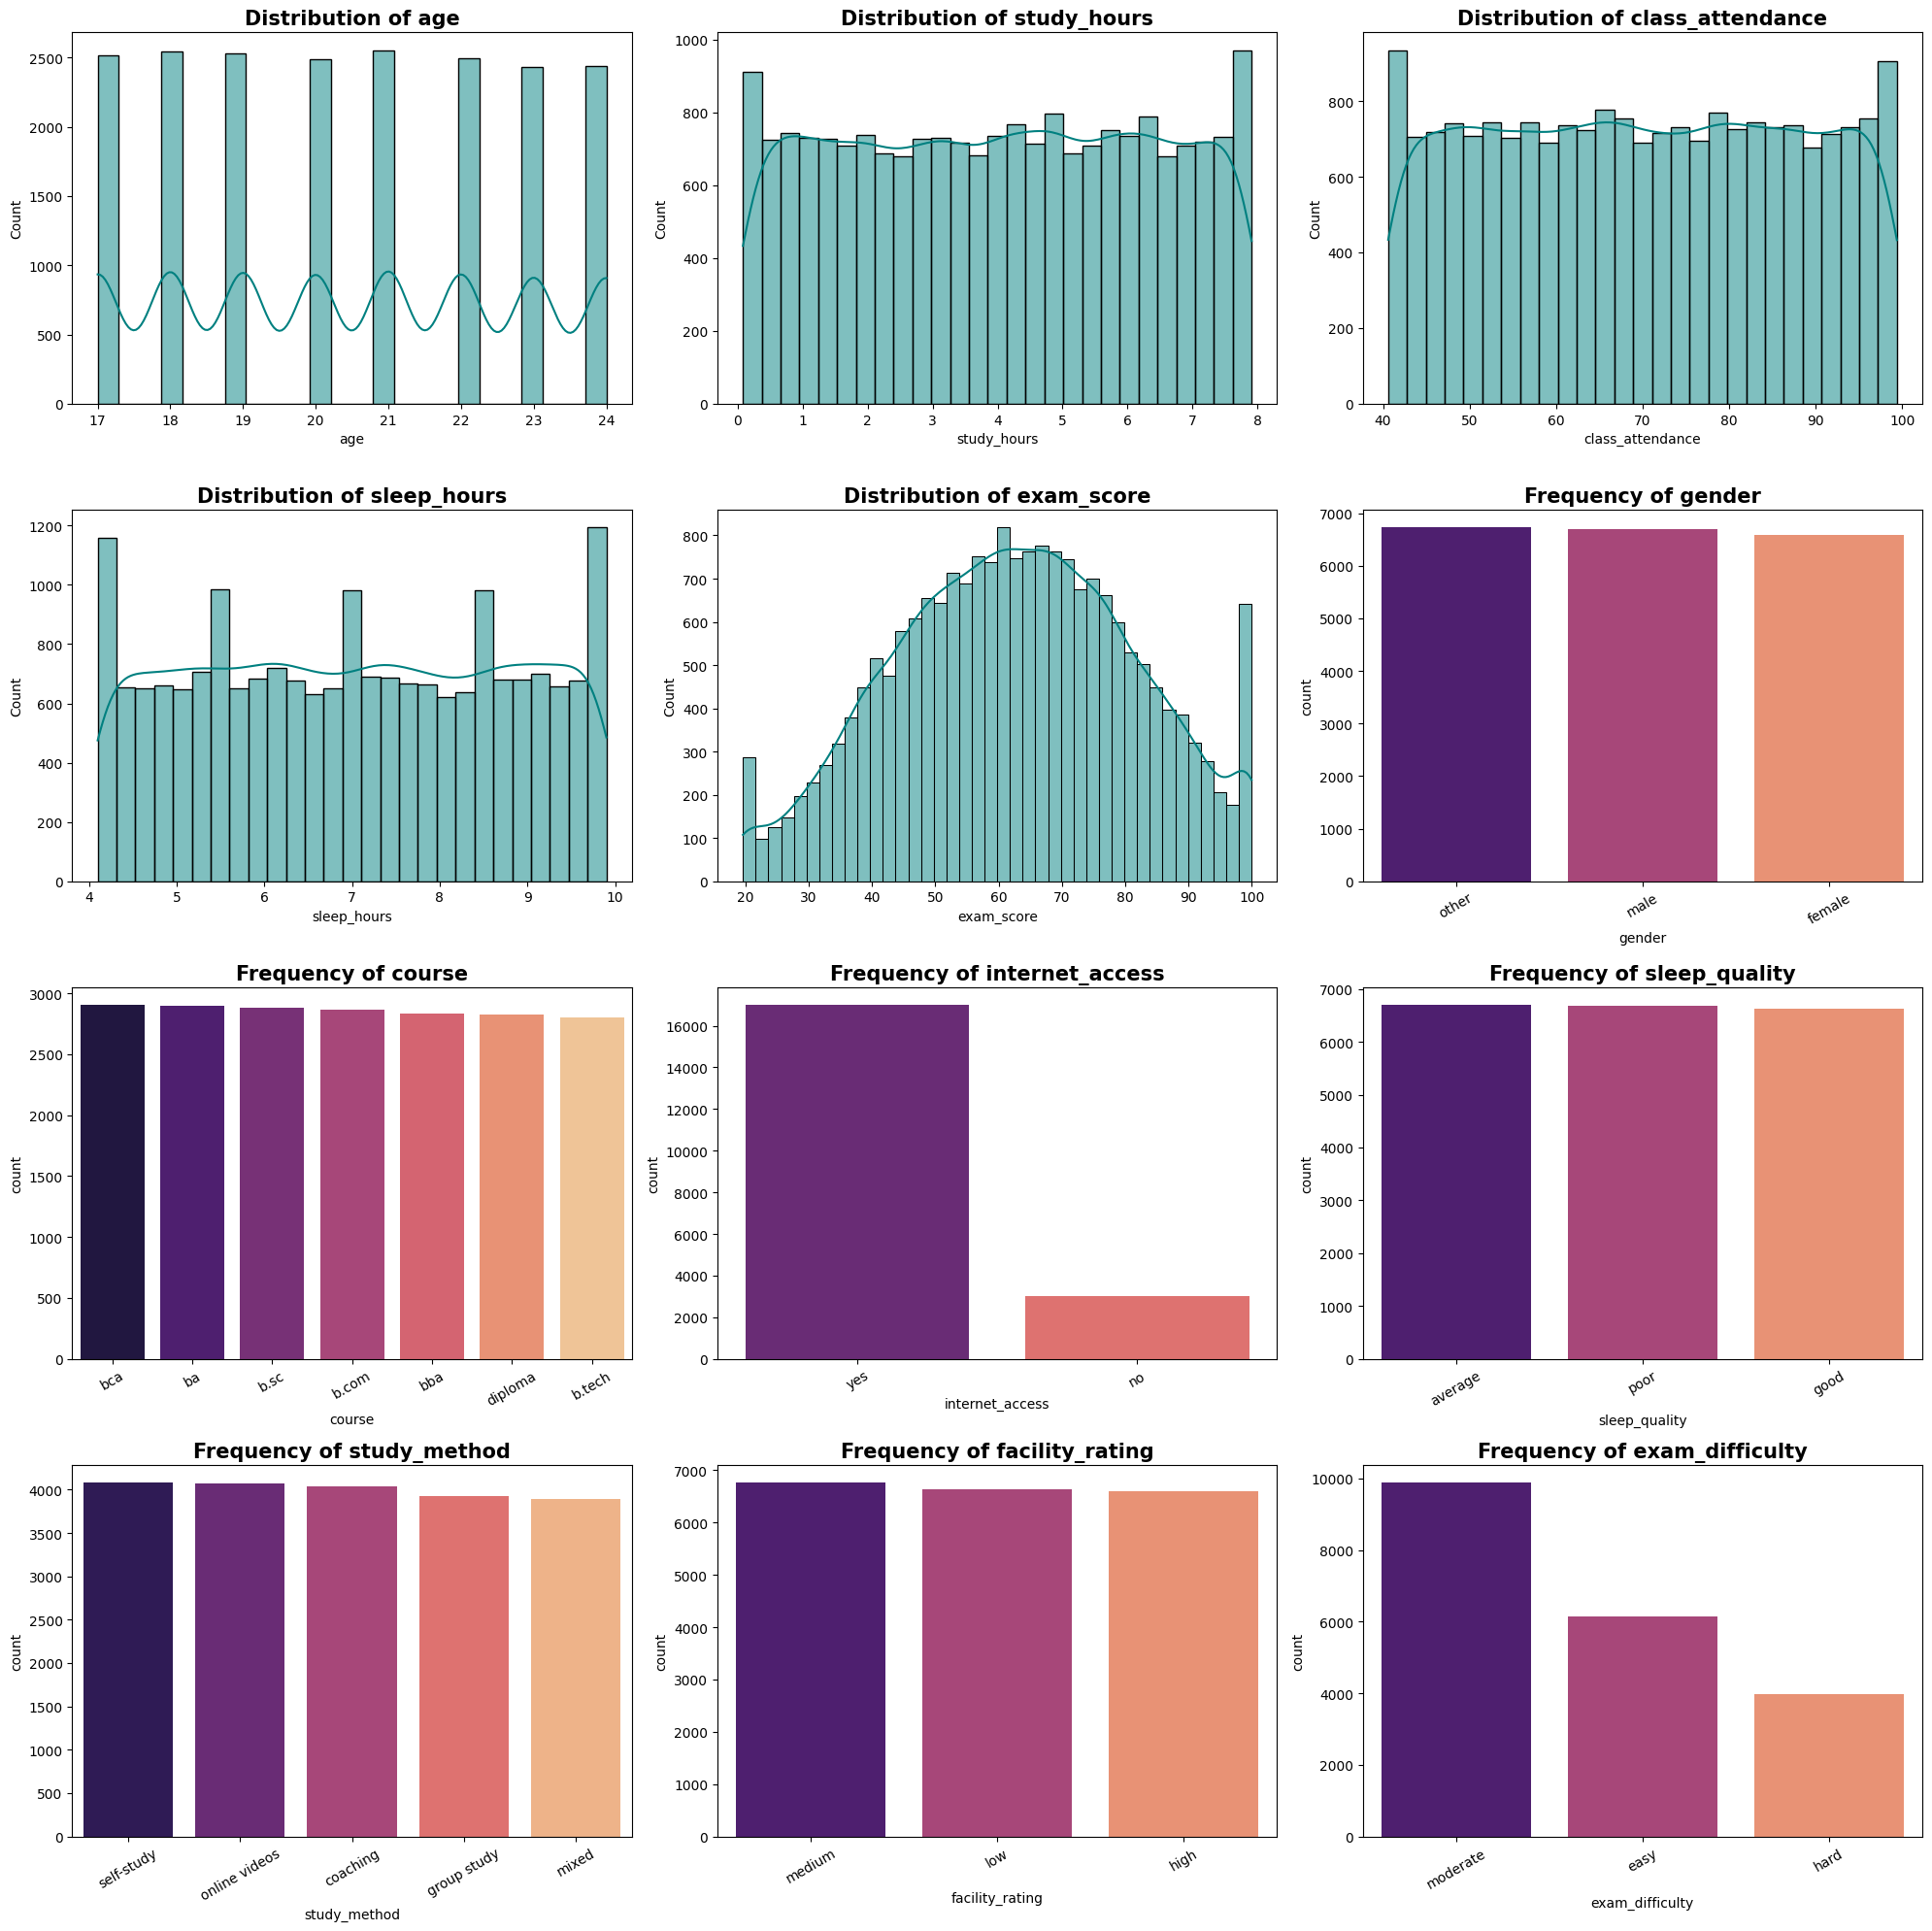

In [ ]:
df_viz = df.drop(columns=['student_id'])
num_cols = df_viz.select_dtypes(include=['number']).columns.tolist()
cat_cols = df_viz.select_dtypes(include=['object']).columns.tolist()
all_cols = num_cols + cat_cols
n_cols = 3
n_rows = math.ceil(len(all_cols) / n_cols)
plt.figure(figsize=(20, n_rows * 5))
for i, col in enumerate(all_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    if col in num_cols:
        # Distribution plot for numerical data
        sns.histplot(df_viz[col], kde=True, color='teal')
        plt.title(f'Distribution of {col}', fontsize=15, fontweight='bold')
    else:
        # Count plot for categorical data
        sns.countplot(data=df_viz, x=col, palette='magma',
                      order=df_viz[col].value_counts().index)
        plt.title(f'Frequency of {col}', fontsize=15, fontweight='bold')
        plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('full_dataset_eda.png')
plt.show()

#Data preprocessing


Missing Values

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64


we see the is no missing values

In [ ]:
#handling missing value
df = df.fillna(df.median(numeric_only=True)).apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
#To check for exact duplicate rows across all columns:
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

Total duplicate rows: 0


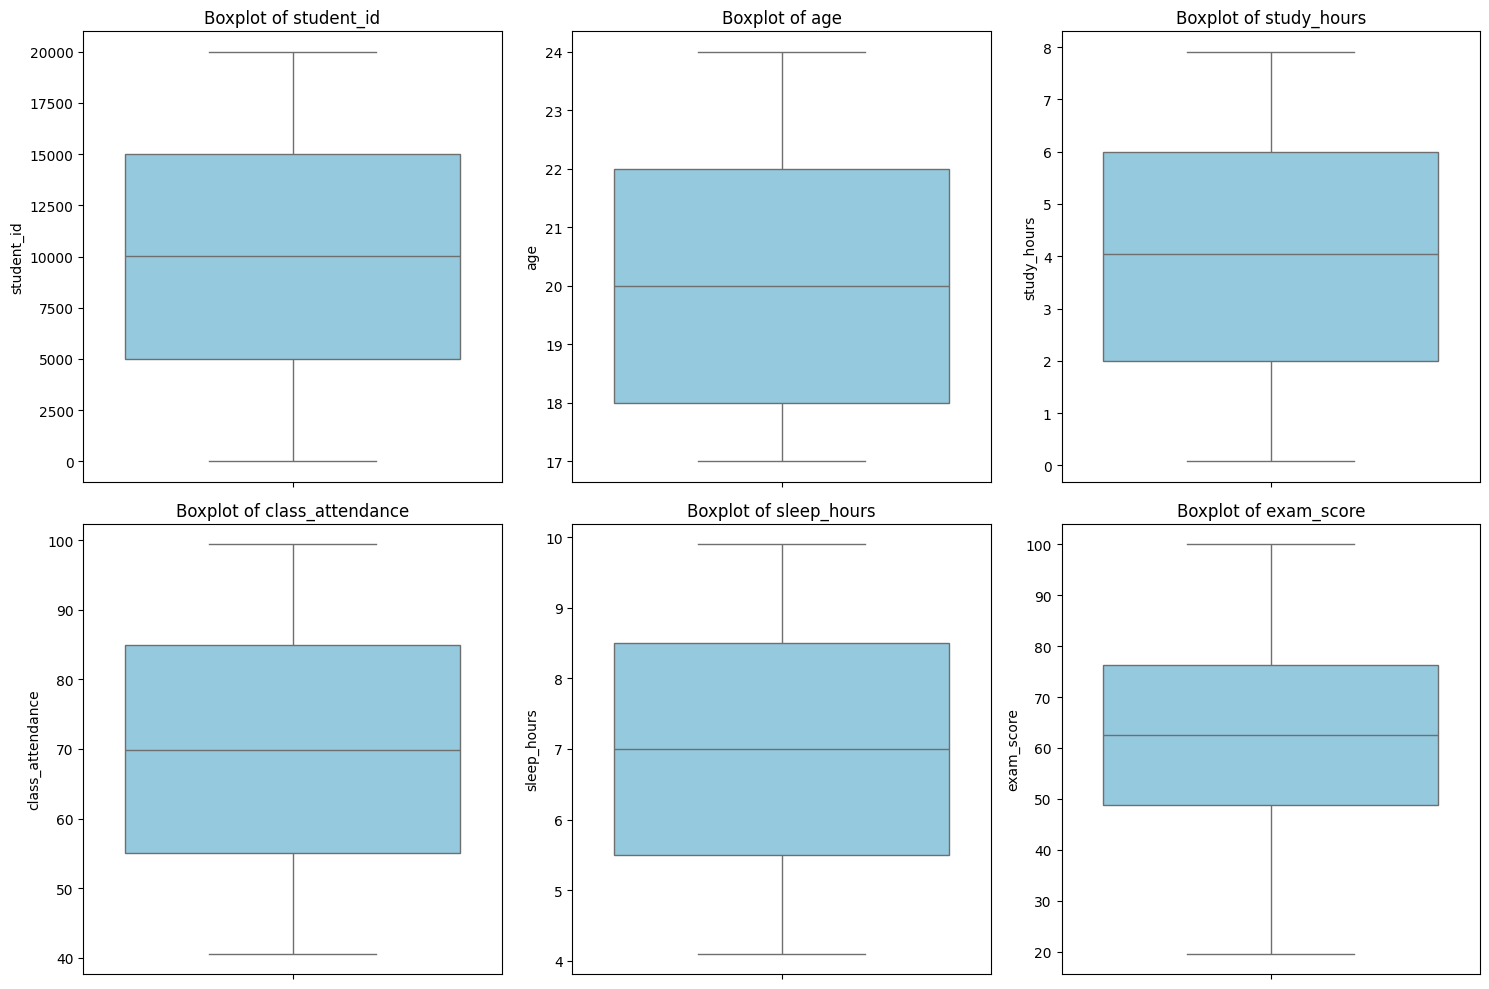

In [ ]:
# Visual Detection using Boxplots to check outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.savefig('outlier_analysis.png')
plt.show()

No Out Lier Detected

In [ ]:
#handling outlier
df[df.select_dtypes('number').columns] = df.select_dtypes('number').clip(lower=df.quantile(0.01, numeric_only=True), upper=df.quantile(0.99, numeric_only=True), axis=1)

In [ ]:
#Preprocessing
# Drop non-predictive column
df_model = df.drop(columns=['student_id'])

# Map Ordinal Categories (where order matters)
df_model['sleep_quality'] = df_model['sleep_quality'].map({'poor': 0, 'average': 1, 'good': 2})
df_model['facility_rating'] = df_model['facility_rating'].map({'low': 0, 'medium': 1, 'high': 2})
df_model['exam_difficulty'] = df_model['exam_difficulty'].map({'easy': 0, 'moderate': 1, 'hard': 2})
df_model['internet_access'] = df_model['internet_access'].map({'no': 0, 'yes': 1})

# One-Hot Encode Nominal Categories (where order doesn't matter)
df_model = pd.get_dummies(df_model, columns=['gender', 'course', 'study_method'], drop_first=True)

#Feature add

In [ ]:
# 1. Add Pass/Fail Feature (Setting 50 as the passing threshold)
df_model['pass_status'] = np.where(df_model['exam_score'] >= 50, 'Pass', 'Fail')

# 2. Add Grade Feature (Based on standard grading scales)
def assign_grade(score):
    if score >= 90: return 'A+'
    elif score >= 80: return 'A'
    elif score >= 70: return 'B'
    elif score >= 60: return 'C'
    elif score >= 50: return 'D'
    else: return 'F'

df_model['grade'] = df_model['exam_score'].apply(assign_grade)

# 3. One-Hot Encoding the new Categorical Features
df_model = pd.get_dummies(df_model, columns=['pass_status', 'grade'], drop_first=True)

# Save the updated dataset
df_model.to_csv('Processed_Data_with_Features.csv', index=False)

#Split the data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import joblib

df = pd.read_csv('Exam_Score_Prediction.csv')
df_model = df.drop(columns=['student_id'])

# Mapping Ordinal values
df_model['sleep_quality'] = df_model['sleep_quality'].map({'poor': 0, 'average': 1, 'good': 2})
df_model['facility_rating'] = df_model['facility_rating'].map({'low': 0, 'medium': 1, 'high': 2})
df_model['exam_difficulty'] = df_model['exam_difficulty'].map({'easy': 0, 'moderate': 1, 'hard': 2})
df_model['internet_access'] = df_model['internet_access'].map({'no': 0, 'yes': 1})

# Creating Target (Pass/Fail)
df_model['pass_status'] = (df_model['exam_score'] >= 50).astype(int)

# One-Hot Encoding nominal columns
df_model = pd.get_dummies(df_model, columns=['gender', 'course', 'study_method'], drop_first=True)


In [ ]:
# Define features and target
X = df_model.drop(columns=['exam_score', 'pass_status'])
y = df_model['pass_status']

# 7. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Scaling Standardization

In [ ]:
# Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection (Top 12 most relevant features)
selector = SelectKBest(score_func=f_classif, k=12)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print("Step 9: Selected Features:\n", list(selected_features))

Step 9: Selected Features:
 ['study_hours', 'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality', 'facility_rating', 'exam_difficulty', 'course_ba', 'study_method_group study', 'study_method_mixed', 'study_method_online videos', 'study_method_self-study']


In [ ]:
# Dictionary to store accuracy
scores = {}

# 1. Logistic Regression
lr = LogisticRegression().fit(X_train_selected, y_train)
scores['Logistic Regression'] = accuracy_score(y_test, lr.predict(X_test_selected))

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42).fit(X_train_selected, y_train)
scores['Decision Tree'] = accuracy_score(y_test, dt.predict(X_test_selected))

# 3. Random Forest
rf = RandomForestClassifier(random_state=42).fit(X_train_selected, y_train)
scores['Random Forest'] = accuracy_score(y_test, rf.predict(X_test_selected))

# 4. SVC
svc = SVC().fit(X_train_selected, y_train)
scores['SVC'] = accuracy_score(y_test, svc.predict(X_test_selected))

# 5. KNN
knn = KNeighborsClassifier().fit(X_train_selected, y_train)
scores['KNN'] = accuracy_score(y_test, knn.predict(X_test_selected))

# 6. Naive Bayes
nb = GaussianNB().fit(X_train_selected, y_train)
scores['Naive Bayes'] = accuracy_score(y_test, nb.predict(X_test_selected))

# 7. CNN (Simple 1D)
X_train_cnn = X_train_selected.reshape(X_train_selected.shape[0], X_train_selected.shape[1], 1)
X_test_cnn = X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(16, 2, activation='relu', input_shape=(12, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=5, verbose=0)
scores['CNN'] = accuracy_score(y_test, (cnn.predict(X_test_cnn) > 0.5).astype(int))

# 14. Compare
print("Model Comparison Results:")
for model, acc in scores.items():
    print(f"{model}: {acc:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model Comparison Results:
Logistic Regression: 0.8648
Decision Tree: 0.7950
Random Forest: 0.8560
SVC: 0.8585
KNN: 0.8360
Naive Bayes: 0.8462
CNN: 0.8580


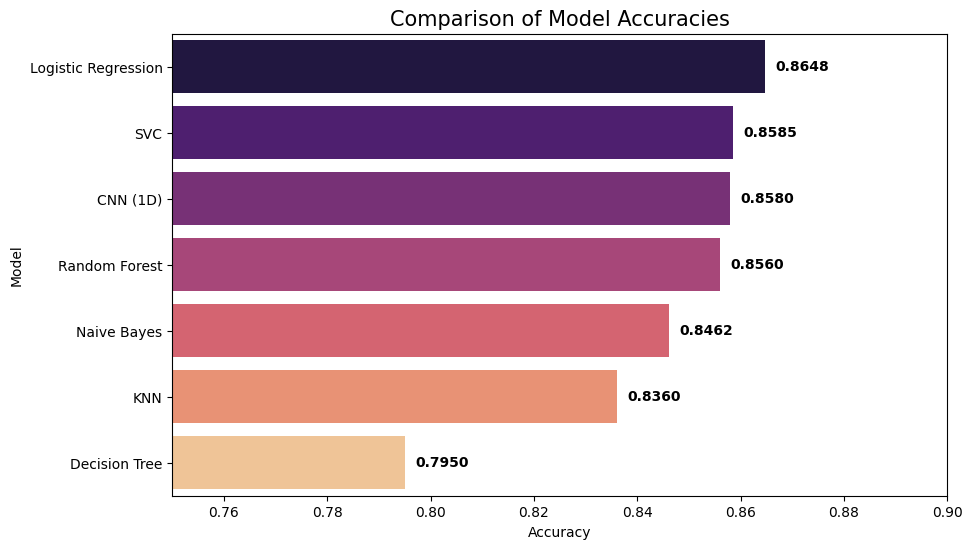

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data from our comparison
results = {
    'Logistic Regression': 0.8648,
    'CNN (1D)': 0.8580,
    'SVC': 0.8585,
    'Random Forest': 0.8560,
    'Naive Bayes': 0.8462,
    'KNN': 0.8360,
    'Decision Tree': 0.7950
}

# Convert to a sorted list
comparison_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='magma')

# Customizing the graph
plt.title('Comparison of Model Accuracies', fontsize=15)
plt.xlim(0.75, 0.90)  # Zoom in to see the differences clearly
for i, v in enumerate(comparison_df['Accuracy']):
    plt.text(v + 0.002, i, f"{v:.4f}", color='black', va='center', fontweight='bold')

plt.show()

#Optimization & Feature Importance


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 11. Model Train (Optimization)
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # Solvers that support L1 regularization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the optimized model
best_logistic_model = grid_search.best_estimator_

print(f"Optimization Complete. Best Parameters: {grid_search.best_params_}")

Optimization Complete. Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Final Optimized Accuracy: 0.8630

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      1084
           1       0.90      0.92      0.91      2916

    accuracy                           0.86      4000
   macro avg       0.83      0.82      0.82      4000
weighted avg       0.86      0.86      0.86      4000



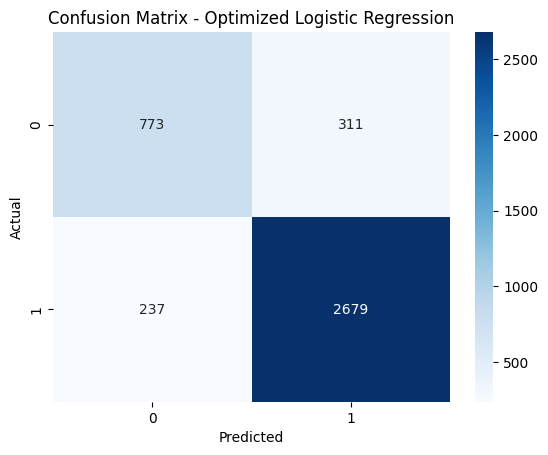

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 12. Model test
y_pred = best_logistic_model.predict(X_test_scaled)

# 13. Model Evaluate
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Optimized Accuracy: {final_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Optimized Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Top Features impacting student Pass/Fail status:
                       Feature  Importance
1                  study_hours    2.524229
2             class_attendance    1.091331
19     study_method_self-study    0.722865
5                sleep_quality    0.718040
18  study_method_online videos    0.648830
16    study_method_group study    0.585365
6              facility_rating    0.582357
4                  sleep_hours    0.472913
17          study_method_mixed    0.330800
13                  course_bba    0.031497


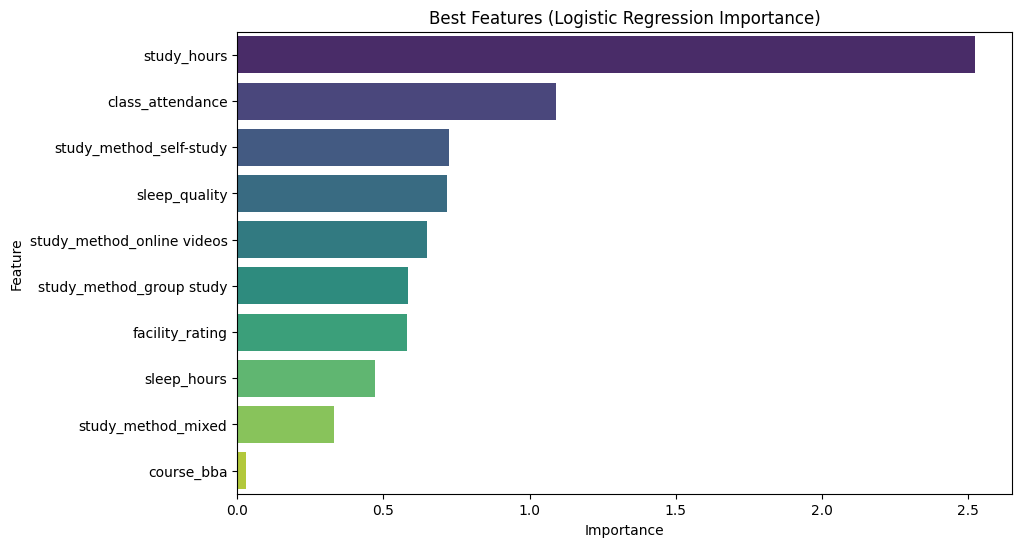

In [ ]:
# 14. Feature selection based on best model
importance = np.abs(best_logistic_model.coef_[0])
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("Top Features impacting student Pass/Fail status:")
print(feature_importance_df.head(10))

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Best Features (Logistic Regression Importance)')
plt.show()

Save the Best Model

In [ ]:
import joblib

# 15. Save the final optimized model and scaler
joblib.dump(best_logistic_model, 'optimized_exam_prediction_model.pkl')
joblib.dump(scaler, 'final_scaler.pkl')

print("All steps complete. Final optimized model and scaler have been saved.")

All steps complete. Final optimized model and scaler have been saved.
